In [28]:
from snow import Snow
import torch
import torch.nn as nn

In [126]:
# device = "cuda:1"
dataset_id = 3
dataset_names = ["dtd", "action", "birds", "cars"]#, "food"]
dataset_classes = [47, 40, 200, 196]#, 101]
model = Snow(8, 8, dataset_classes[dataset_id], variance=0.001)


In [127]:
model.load_state_dict(torch.load(f"SNOW_{dataset_names[dataset_id]}.pth"))

<All keys matched successfully>

In [128]:
delta_model_weights = model.delta_model.conv1.weight
_, indices =  torch.topk(model.delta_model.conv1_chp.params,8)
source_model_weights = model.source_model.conv1.weight

In [129]:
filters = []
for i in range(8):
    a = delta_model_weights[i, :, :, :].view(7,7,3).detach().numpy()
    filters.append((a - a.min())/(a.max()-a.min()))
source_model_filters = []

for i in range(8):
    a = source_model_weights[indices[i], :, :, :].view(7,7,3).detach().numpy()
    source_model_filters.append((a - a.min())/(a.max()-a.min()))

In [130]:
import matplotlib.pyplot as plt

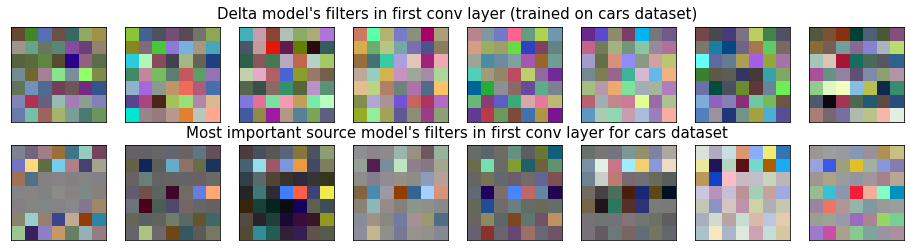

In [131]:
fig, big_axs = plt.subplots(2, 1, figsize=[16,4])

big_axs[0].get_xaxis().set_visible(False)
big_axs[0].get_yaxis().set_visible(False)
big_axs[0]._frameon=False
big_axs[0].set_title(f"Delta model's filters in first conv layer (trained on {dataset_names[dataset_id]} dataset)", fontsize=15)

big_axs[1].get_xaxis().set_visible(False)
big_axs[1].get_yaxis().set_visible(False)
big_axs[1]._frameon=False
big_axs[1].set_title(f"Most important source model's filters in first conv layer for {dataset_names[dataset_id]} dataset", fontsize=15)



for i in range(8):
    ax = fig.add_subplot(2,8,i+1)
    ax.imshow(filters[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for i in range(8):
    ax = fig.add_subplot(2,8,i+9)
    ax.imshow(source_model_filters[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)